<a href="https://colab.research.google.com/github/CharanLawha/Practice/blob/main/Loan_Approval_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
path = '/content/LoanApprovalPrediction.csv'
df = pd.read_csv(path)

In [5]:
df.sample(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
340,LP002137,Male,Yes,0.0,Graduate,No,6333,4583.0,259.0,360.0,NaN,Semiurban,Y
46,LP001144,Male,Yes,0.0,Graduate,No,5821,0.0,144.0,360.0,1.0,Urban,Y
87,LP001289,Male,No,0.0,Graduate,No,8566,0.0,210.0,360.0,1.0,Urban,Y
545,LP002798,Male,Yes,0.0,Graduate,No,3887,2669.0,162.0,360.0,1.0,Semiurban,Y
149,LP001531,Male,No,0.0,Graduate,No,9166,0.0,244.0,360.0,1.0,Urban,N


In [6]:
df.shape


(598, 13)

In [7]:
df.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,12
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,21
Loan_Amount_Term,14


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            598 non-null    object 
 1   Gender             598 non-null    object 
 2   Married            598 non-null    object 
 3   Dependents         586 non-null    float64
 4   Education          598 non-null    object 
 5   Self_Employed      598 non-null    object 
 6   ApplicantIncome    598 non-null    int64  
 7   CoapplicantIncome  598 non-null    float64
 8   LoanAmount         577 non-null    float64
 9   Loan_Amount_Term   584 non-null    float64
 10  Credit_History     549 non-null    float64
 11  Property_Area      598 non-null    object 
 12  Loan_Status        598 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 60.9+ KB


In [9]:
df['Education'].value_counts()

,count
Education,
Graduate,465
Not Graduate,133


In [10]:
df['Property_Area'].value_counts()

,count
Property_Area,
Semiurban,225
Urban,198
Rural,175


In [11]:
df['Dependents'].value_counts()

,count
Dependents,
0.0,338
1.0,101
2.0,99
3.0,48


In [12]:
df['LoanAmount'].mean()

np.float64(144.9688041594454)

In [13]:
df.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,586.000000,598.000000,598.000000,577.000000,584.000000,549.000000
mean,0.755973,5292.252508,1631.499866,144.968804,341.917808,0.843352
std,1.007751,5807.265364,2953.315785,82.704182,65.205994,0.363800
min,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000
25%,0.000000,2877.500000,0.000000,100.000000,360.000000,1.000000
50%,0.000000,3806.000000,1211.500000,127.000000,360.000000,1.000000
75%,1.750000,5746.000000,2324.000000,167.000000,360.000000,1.000000
max,3.000000,81000.000000,41667.000000,650.000000,480.000000,1.000000


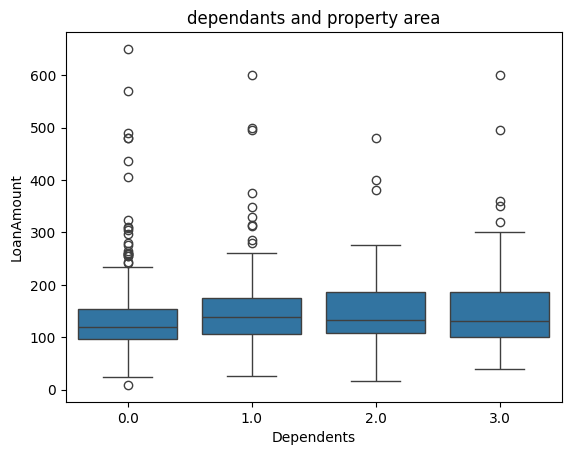

In [14]:
sns.boxplot(x='Dependents',y='LoanAmount',data=df)
plt.title('dependants and property area')
plt.show()

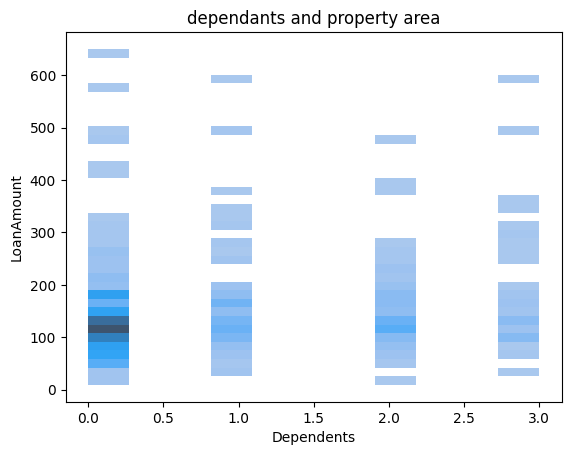

In [23]:
sns.histplot(x='Dependents',y='LoanAmount',data=df)
plt.title('dependants and property area')
plt.show()

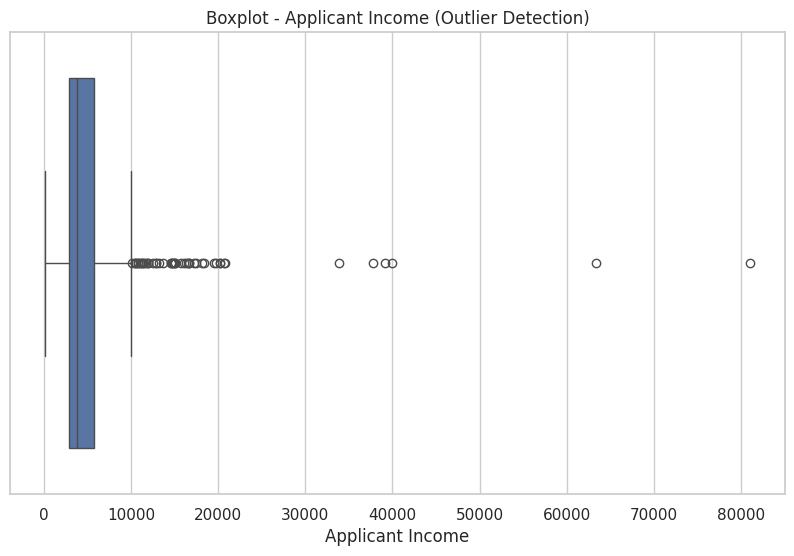

In [24]:
sns.set(style="whitegrid")

# ----------------------------
# 1. Boxplot for Outlier Detection
# ----------------------------
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['ApplicantIncome'])
plt.title("Boxplot - Applicant Income (Outlier Detection)")
plt.xlabel("Applicant Income")
plt.show()

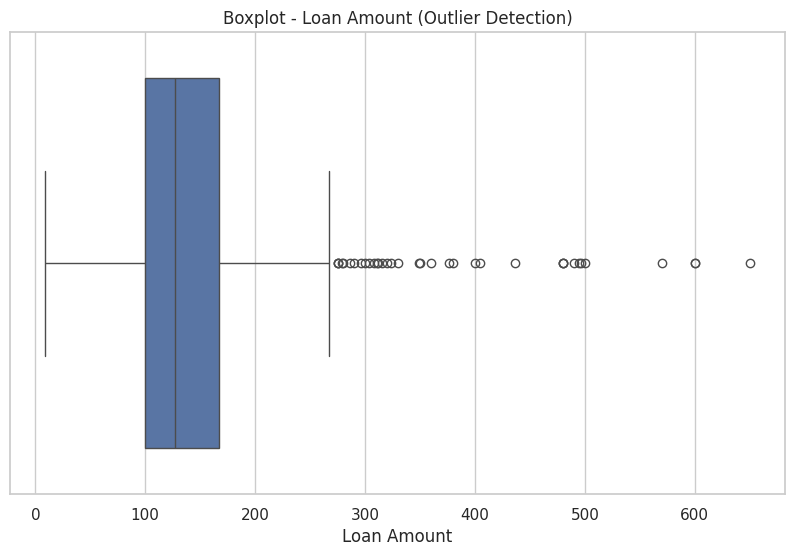

In [25]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['LoanAmount'])
plt.title("Boxplot - Loan Amount (Outlier Detection)")
plt.xlabel("Loan Amount")
plt.show()

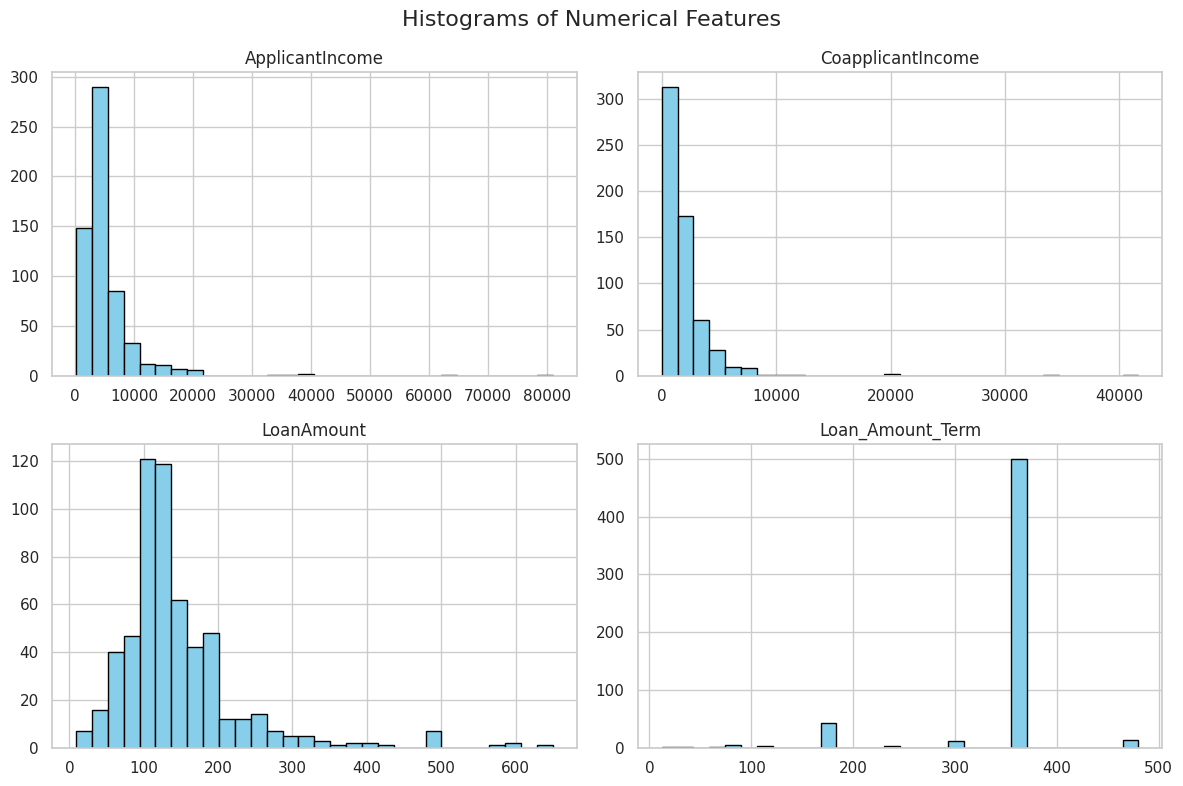

In [26]:
numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

df[numerical_cols].hist(bins=30, figsize=(12, 8), color='skyblue', edgecolor='black')
plt.suptitle("Histograms of Numerical Features", fontsize=16)
plt.tight_layout()
plt.show()

In [30]:
df.sample(9)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Gender_Num
230,LP001786,Male,Yes,0.0,Graduate,Yes,5746,0.0,255.0,360.0,NaN,Urban,N,1
464,LP002527,Male,Yes,2.0,Graduate,Yes,16525,1014.0,150.0,360.0,1.0,Rural,Y,1
355,LP002178,Male,Yes,0.0,Graduate,No,3013,3033.0,95.0,300.0,NaN,Urban,Y,1
192,LP001669,Female,No,0.0,Not Graduate,No,1907,2365.0,120.0,NaN,1.0,Urban,Y,0
411,LP002347,Male,Yes,0.0,Graduate,No,3246,1417.0,138.0,360.0,1.0,Semiurban,Y,1
338,LP002130,Male,Yes,NaN,Not Graduate,No,3523,3230.0,152.0,360.0,0.0,Rural,N,1
572,LP002916,Male,Yes,0.0,Graduate,No,2297,1522.0,104.0,360.0,1.0,Urban,Y,1
38,LP001116,Male,No,0.0,Not Graduate,No,3748,1668.0,110.0,360.0,1.0,Semiurban,Y,1
532,LP002767,Male,Yes,0.0,Graduate,No,2768,1950.0,155.0,360.0,1.0,Rural,Y,1


In [15]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

In [16]:
df['Gender_Num'] = le.fit_transform(df['Gender'])

In [17]:
df['Married_Num'] = le.fit_transform(df['Married'])

In [18]:
df['Education_Num'] = le.fit_transform(df['Education'])

In [19]:
df['Self_Employed_Num'] = le.fit_transform(df['Self_Employed'])

In [26]:
df.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,12
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,14


In [21]:
df['Credit_History'].value_counts()

,count
Credit_History,
1.0,463
0.0,86


In [22]:
df['Credit_History'].mean()

np.float64(0.843351548269581)

/tmp/ipython-input-23-2796564010.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Credit_History', data=df, palette='pastel')


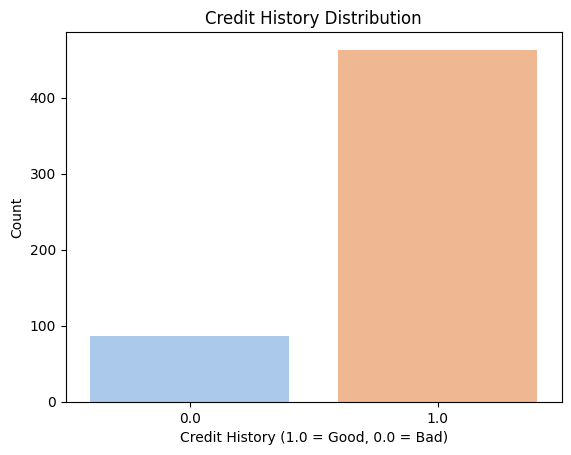

In [23]:
sns.countplot(x='Credit_History', data=df, palette='pastel')
plt.title('Credit History Distribution')
plt.xlabel('Credit History (1.0 = Good, 0.0 = Bad)')
plt.ylabel('Count')
plt.show()

In [24]:
df['Loan_Amount_Term'].value_counts()

,count
Loan_Amount_Term,
360.0,500
180.0,43
480.0,14
300.0,12
84.0,4
120.0,3
240.0,3
60.0,2
36.0,2


In [25]:
df['LoanAmount'].fillna(df['LoanAmount'].median() , inplace=True)
#df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)


/tmp/ipython-input-25-3152762028.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['LoanAmount'].fillna(df['LoanAmount'].median() , inplace=True)


In [34]:
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0] , inplace=True)

/tmp/ipython-input-34-709147122.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0] , inplace=True)


In [36]:
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)


/tmp/ipython-input-36-3619336793.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)


In [32]:
df['Dependents'].fillna(df['Dependents'].mode()[0] , inplace=True)

/tmp/ipython-input-32-1294664865.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Dependents'].fillna(df['Dependents'].mode()[0] , inplace=True)


In [37]:
df.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [38]:
df.sample(8)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Gender_Num,Married_Num,Education_Num,Self_Employed_Num
119,LP001430,Female,No,0.0,Graduate,No,4166,0.0,44.0,360.0,1.0,Semiurban,Y,0,0,0,0
180,LP001639,Female,Yes,0.0,Graduate,No,3625,0.0,108.0,360.0,1.0,Semiurban,Y,0,1,0,0
500,LP002648,Male,Yes,0.0,Graduate,No,2130,6666.0,70.0,180.0,1.0,Semiurban,N,1,1,0,0
125,LP001451,Male,Yes,1.0,Graduate,Yes,10513,3850.0,160.0,180.0,0.0,Urban,N,1,1,0,1
43,LP001136,Male,Yes,0.0,Not Graduate,Yes,4695,0.0,96.0,360.0,1.0,Urban,Y,1,1,1,1
45,LP001138,Male,Yes,1.0,Graduate,No,5649,0.0,44.0,360.0,1.0,Urban,Y,1,1,0,0
390,LP002284,Male,No,0.0,Not Graduate,No,3902,1666.0,109.0,360.0,1.0,Rural,Y,1,0,1,0
116,LP001421,Male,Yes,0.0,Graduate,No,5568,2142.0,175.0,360.0,1.0,Rural,N,1,1,0,0


In [39]:
df['Property_Area'].value_counts()

,count
Property_Area,
Semiurban,225
Urban,198
Rural,175


In [40]:
# One-hot encode the Property_Area column
df = pd.get_dummies(df, columns=['Property_Area'], drop_first=True)


In [45]:
y=df['Loan_Status']

In [47]:
x=df[['Gender_Num', 'Married_Num', 'Education_Num', 'Self_Employed_Num',
        'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
        'Loan_Amount_Term', 'Credit_History',
        'Property_Area_Semiurban', 'Property_Area_Urban']]

In [48]:
x

,Gender_Num,Married_Num,Education_Num,Self_Employed_Num,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area_Semiurban,Property_Area_Urban
0,1,0,0,0,5849,0.0,127.0,360.0,1.0,False,True
1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,False,False
2,1,1,0,1,3000,0.0,66.0,360.0,1.0,False,True
3,1,1,1,0,2583,2358.0,120.0,360.0,1.0,False,True
4,1,0,0,0,6000,0.0,141.0,360.0,1.0,False,True
...,...,...,...,...,...,...,...,...,...,...,...
593,0,0,0,0,2900,0.0,71.0,360.0,1.0,False,False
594,1,1,0,0,4106,0.0,40.0,180.0,1.0,False,False
595,1,1,0,0,8072,240.0,253.0,360.0,1.0,False,True
596,1,1,0,0,7583,0.0,187.0,360.0,1.0,False,True


In [49]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(x,y, test_size=0.2 , random_state=42)

In [53]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [70]:
model = DecisionTreeClassifier(max_depth=8, random_state=42)

In [71]:
model.fit(X_train , y_train)

DecisionTreeClassifier(max_depth=8, random_state=42)

In [72]:
y_pred = model.predict(X_test)

In [80]:
accuracy_score(y_test , y_pred)

0.8166666666666667

In [81]:
model.score(X_train, y_train)

0.8870292887029289

In [75]:
model.score(X_test,y_test)

0.8166666666666667

In [77]:
from sklearn.ensemble import RandomForestClassifier

In [79]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
print("RF Accuracy:", rf.score(X_test, y_test))

RF Accuracy: 0.8
